<h1 align="center"> Tsouros Iakovos Marios </h1>
<h1 align="center"> Computational Solid State Physics </h1>
<h1 align="center"> Problem 5 - ANN </h1>

## Description

Create an artificial neural network (ANN) to solve the X-OR problem, using the back-propagation method. The input level consists of 2 nodes, the hidden level also consists of 2 nodes and the output level consists of one node, as in the diagram. The initial weights of the links should be randomly selected from a uniform distribution  w ∈(-1.1).  The  maximum  acceptable  error  in  the  output  ($\frac{1}{2}|output - target|^2$)  to  be considered 0.01 and the learning rate η= 0.2. The maximum number of training cycles (epochs) will be 10000. After the network training is finished, the computer code should write the final weights of all connections in a file.

## Solution

This problem was solved with a `python` script, which implements the XOR gate algorithm required. The code can be found in the [appendix](#Appendix) or on [github](https://gist.github.com/iakovts/79b917d39f056be2f333b08d0d40e46b). 

The python script is discussed below.


### Discussion of python script

#### Initialization
Nodes and layers are implemented as python `dataclass` classes, which facilitate access to automatic activation of nodes/layers, and other features. In this implementation layers consist of nodes, which offers modularity in adding, extending and generally future-proofing the code.
An example of the functionality of the above is i.e. when the `u` or `y` value of a Node is changed:
```python
#...
    def __setattr__(self, attr, value):
        # When `u` value is changed, update `y` and `delta`
        if attr == "u":
            self.__dict__[attr] = value
            self.__dict__["y"] = self.actf()
            self.__dict__["delta"] = self.actf2()
        elif attr == "y":
            # When `y` is changed, update `delta`
            self.__dict__["delta"] = self.actf2()
        super().__setattr__(attr, value)
#...
```
The `Neural` class implements the `run` method which initializes the network for a list of inputs. It makes a "forward pass" and then backpropagates until all outputs are "trained" (their mean squared loss is less than the targeted error). 
The layer initialization method is the following:
```python
#...
    def init_layers(self, in1, in2):
        self.inp = Layer([Node(), Node()])
        self.inp.set("y", in1, in2)
        self.target = np.logical_xor(in1, in2)
        self.hid = Layer([Node(), Node()])
        self.out = Layer([Node()])
#...
```
It would be simple to add layers this way.

#### Forward pass

The method that implements the forward pass is the following:

```python
#...
    def forward_pass(self):
        # Calculate hidden layer activation
        hid_u = (self.inp.get("y") @ self.hid_w + self.hid_bias).flatten()
        self.hid.set("u", *hid_u)
        # Calculate out layer activation
        out_u = (self.hid.get("y") @ self.out_w.T + self.out_bias).flatten()
        self.out.set("u", *out_u)

        self.error = 0.5 * np.power(self.out.get("y") - self.target, 2)
#...
```
Here, the new `u` values are calculated through multiplying the layer's `y` values with the corresponding weights and adding the biases. The layers are then automatically activated as discussed previously.

#### Back-propagation

The method that implements back-propagation is the following:
```python
#...
    def backpropagate(self):
        # Calculate deltas
        out_d = (self.out.get("delta") * (self.target - self.out.get("y"))).flatten()
        self.out.set("delta", out_d)
        hid_d = (self.hid.get("delta") * (out_d @ self.out_w)).flatten()
        self.hid.set("delta", *hid_d)

        # Update hidden weights and bias
        self.inp.set("delta", [0, 0])
        hid_w_upd = self.inp.get("y").T @ self.hid.get("delta") * self.lr
        self.hid_w += hid_w_upd
        hid_b_upd = self.hid.get("delta") * self.lr
        self.hid_bias += hid_b_upd

        # Update output weights and bias
        out_w_upd = self.hid.get("y") * self.out.get("delta") * self.lr
        self.out_w += out_w_upd
        out_b_upd = self.lr * self.out.get("delta")
        self.out_bias += out_b_upd

#...
```
Deltas are calculated for the output and hidden layer and then the weights are updated. Input layer's deltas are set to 0.

#### Miscellanous

The class implements a `write_to_file` function which writes the results to a txt file following the convention: `trained_weights<learning_rate>-<max_error>.txt`. 
Additionaly, a `run_w_check` method is implemented which, after the network is trained makes one forward pass witch each input and outputs the results of the pass (target vs output for each input).

---
### Results

Results and graphs are presented below, showcasing the network's training for different learning rates and max error thresholds. 

In [1]:
# Basic -> LR = 0.2 ; Max Loss = 0.01
from src.neural_n import Neural
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()

neur = Neural()
neur.run_w_check()

Trained after 3595 epochs with target mean squared loss 0.0100 and LR=0.20
Checking for [(0, 0)]
Target: 0 Out 0.14119647686790823
Checking for [(0, 1)]
Target: 1 Out 0.8586513363776396
Checking for [(1, 0)]
Target: 1 Out 0.858592445117178
Checking for [(1, 1)]
Target: 0 Out 0.1396240702431677


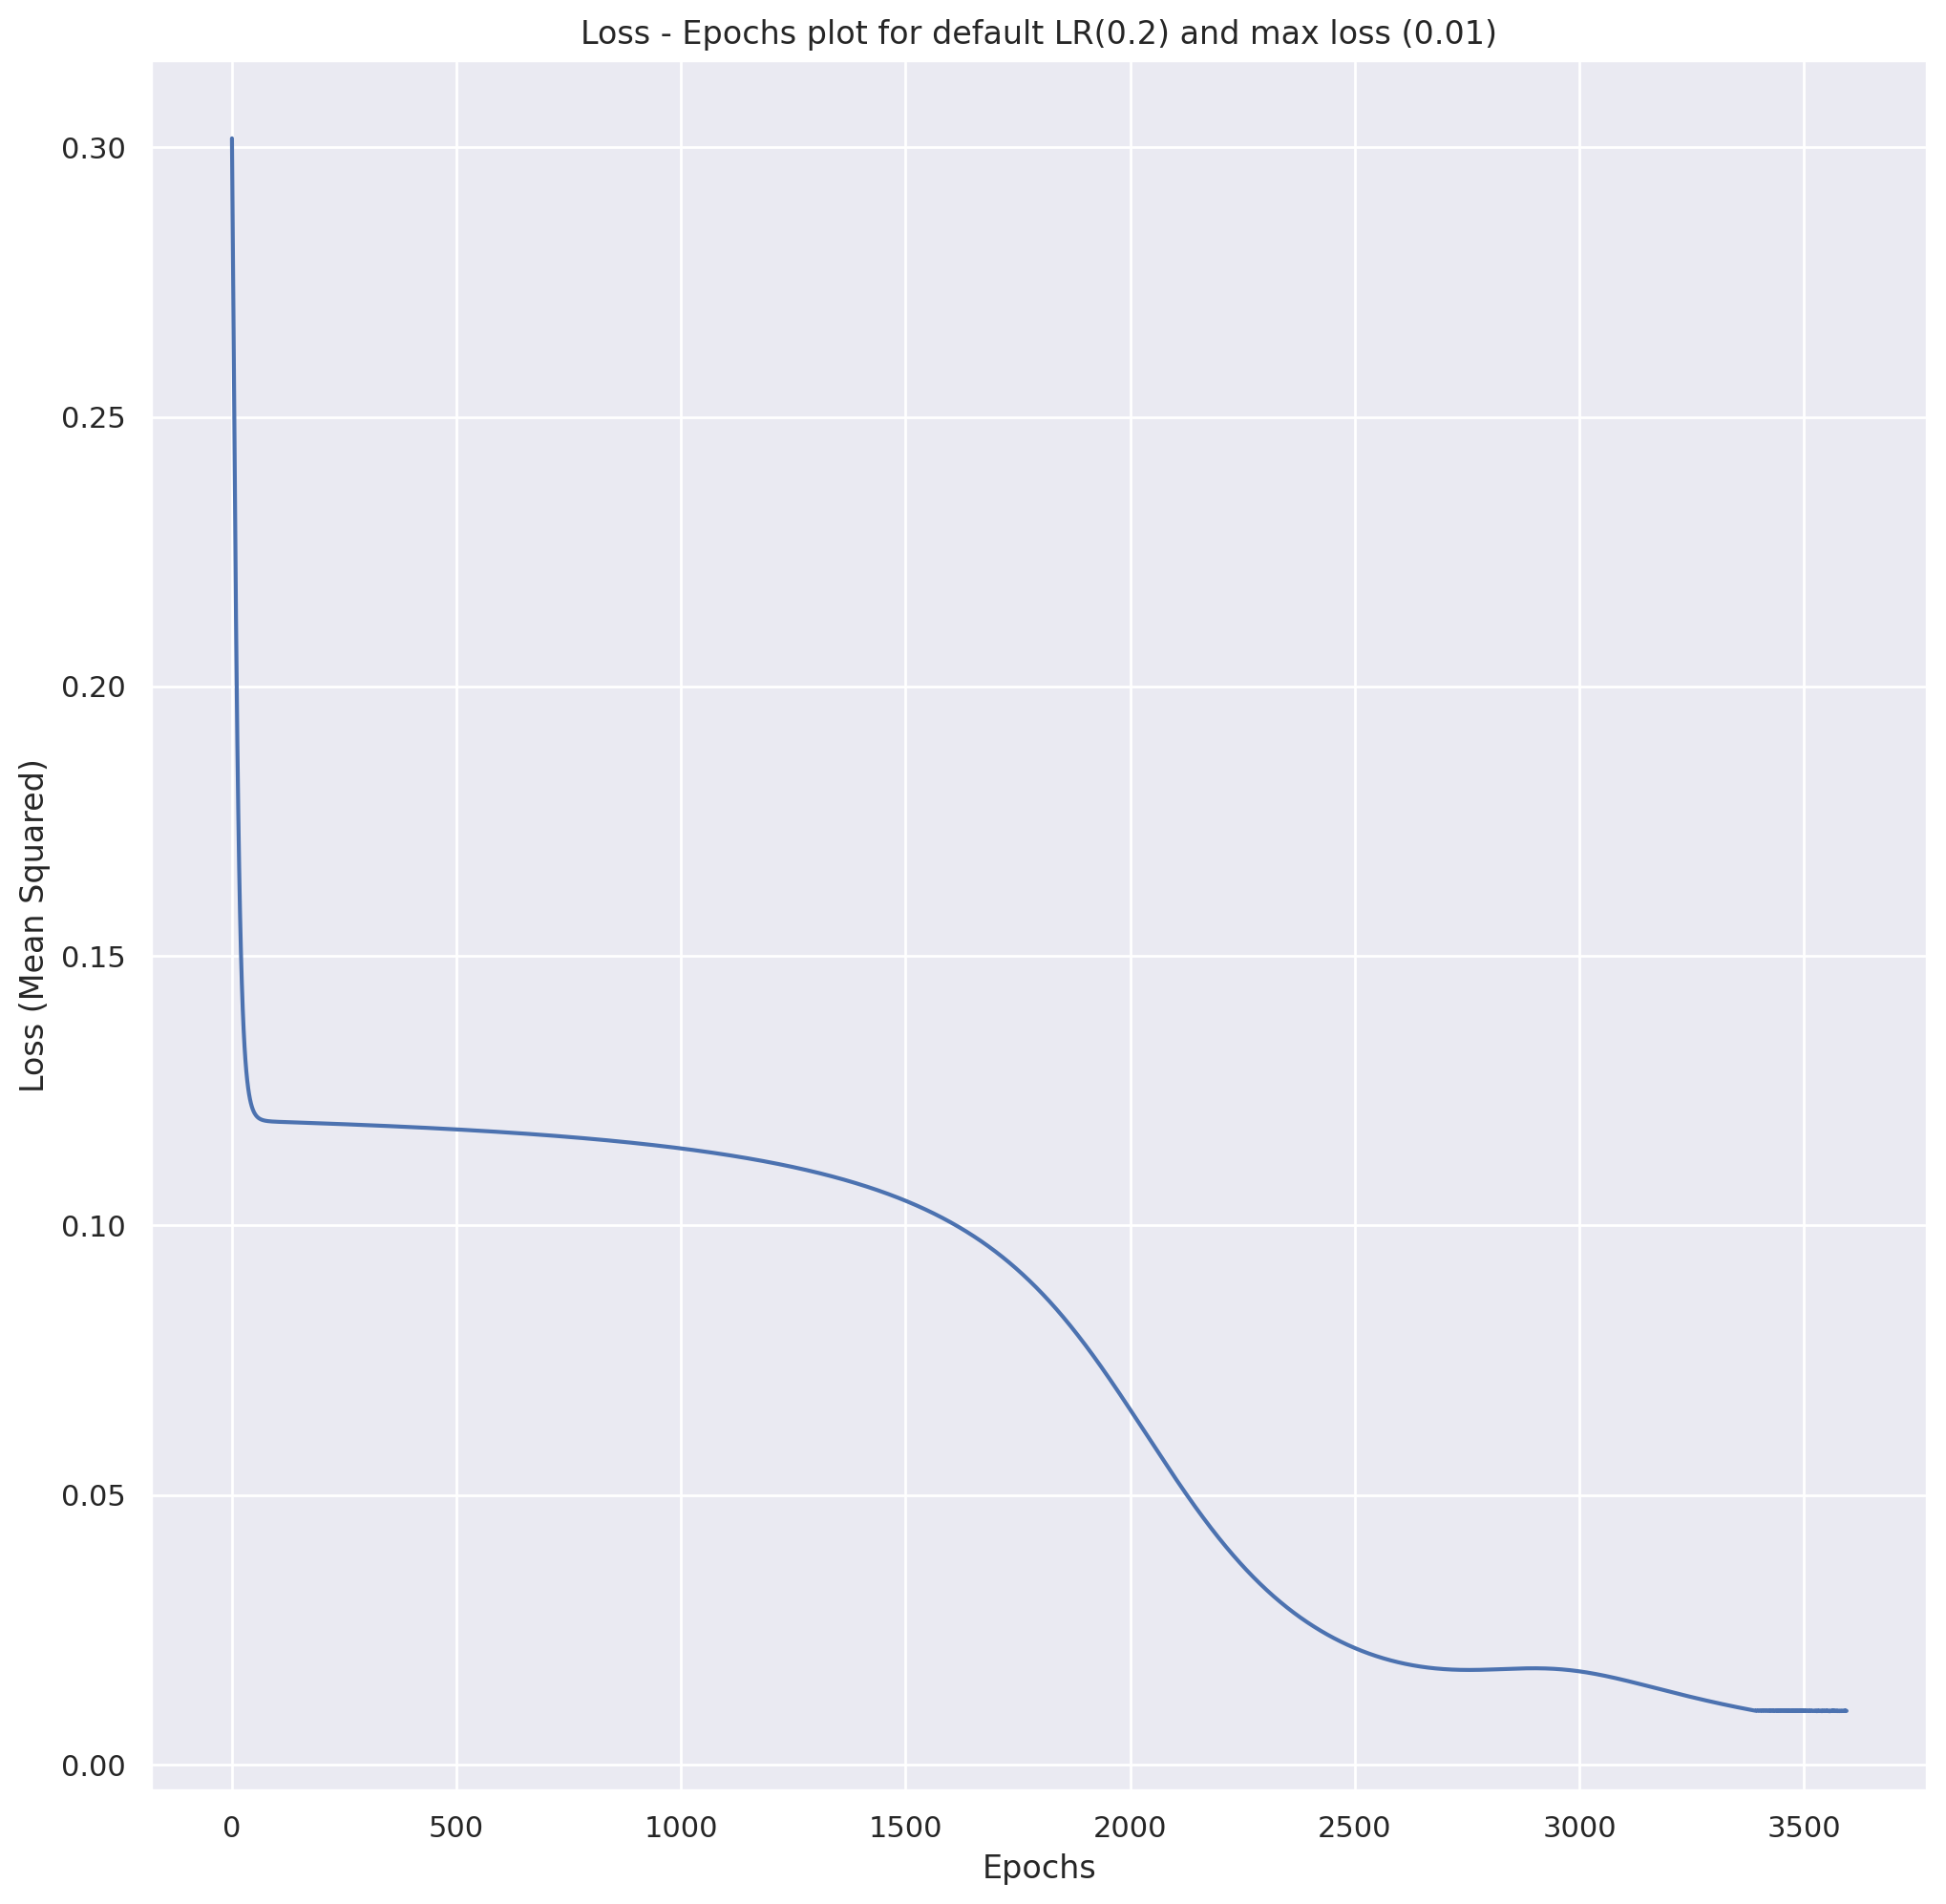

In [2]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=200)

ax.plot(list(neur.track_error))
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss (Mean Squared)")
ax.set_title("Loss - Epochs plot for default LR(0.2) and max loss (0.01)")
plt.show()

In [3]:
import numpy as np

MAX_EPOCH = 20000
MAX_ERROR = 0.0001
LRs = np.arange(0.1, 0.71, 0.05)
neurs = [Neural(lr=l, max_error=MAX_ERROR, epochs=MAX_EPOCH) for l in LRs]
losses = []
for n in neurs:
    n.run_epochs()
    losses.append(n.track_error)

Neural Network did not converge after 19999 epochs with LR=0.10  and max squared loss 0.0001. Current error : 0.1289
Neural Network did not converge after 19999 epochs with LR=0.15  and max squared loss 0.0001. Current error : 0.0003
Neural Network did not converge after 19999 epochs with LR=0.20  and max squared loss 0.0001. Current error : 0.0002
Neural Network did not converge after 19999 epochs with LR=0.25  and max squared loss 0.0001. Current error : 0.0002
Neural Network did not converge after 19999 epochs with LR=0.30  and max squared loss 0.0001. Current error : 0.0565
Neural Network did not converge after 19999 epochs with LR=0.35  and max squared loss 0.0001. Current error : 0.0001
Trained after 19618 epochs with target mean squared loss 0.0001 and LR=0.40
Neural Network did not converge after 19999 epochs with LR=0.45  and max squared loss 0.0001. Current error : 0.1364
Trained after 15681 epochs with target mean squared loss 0.0001 and LR=0.50
Trained after 15657 epochs wi

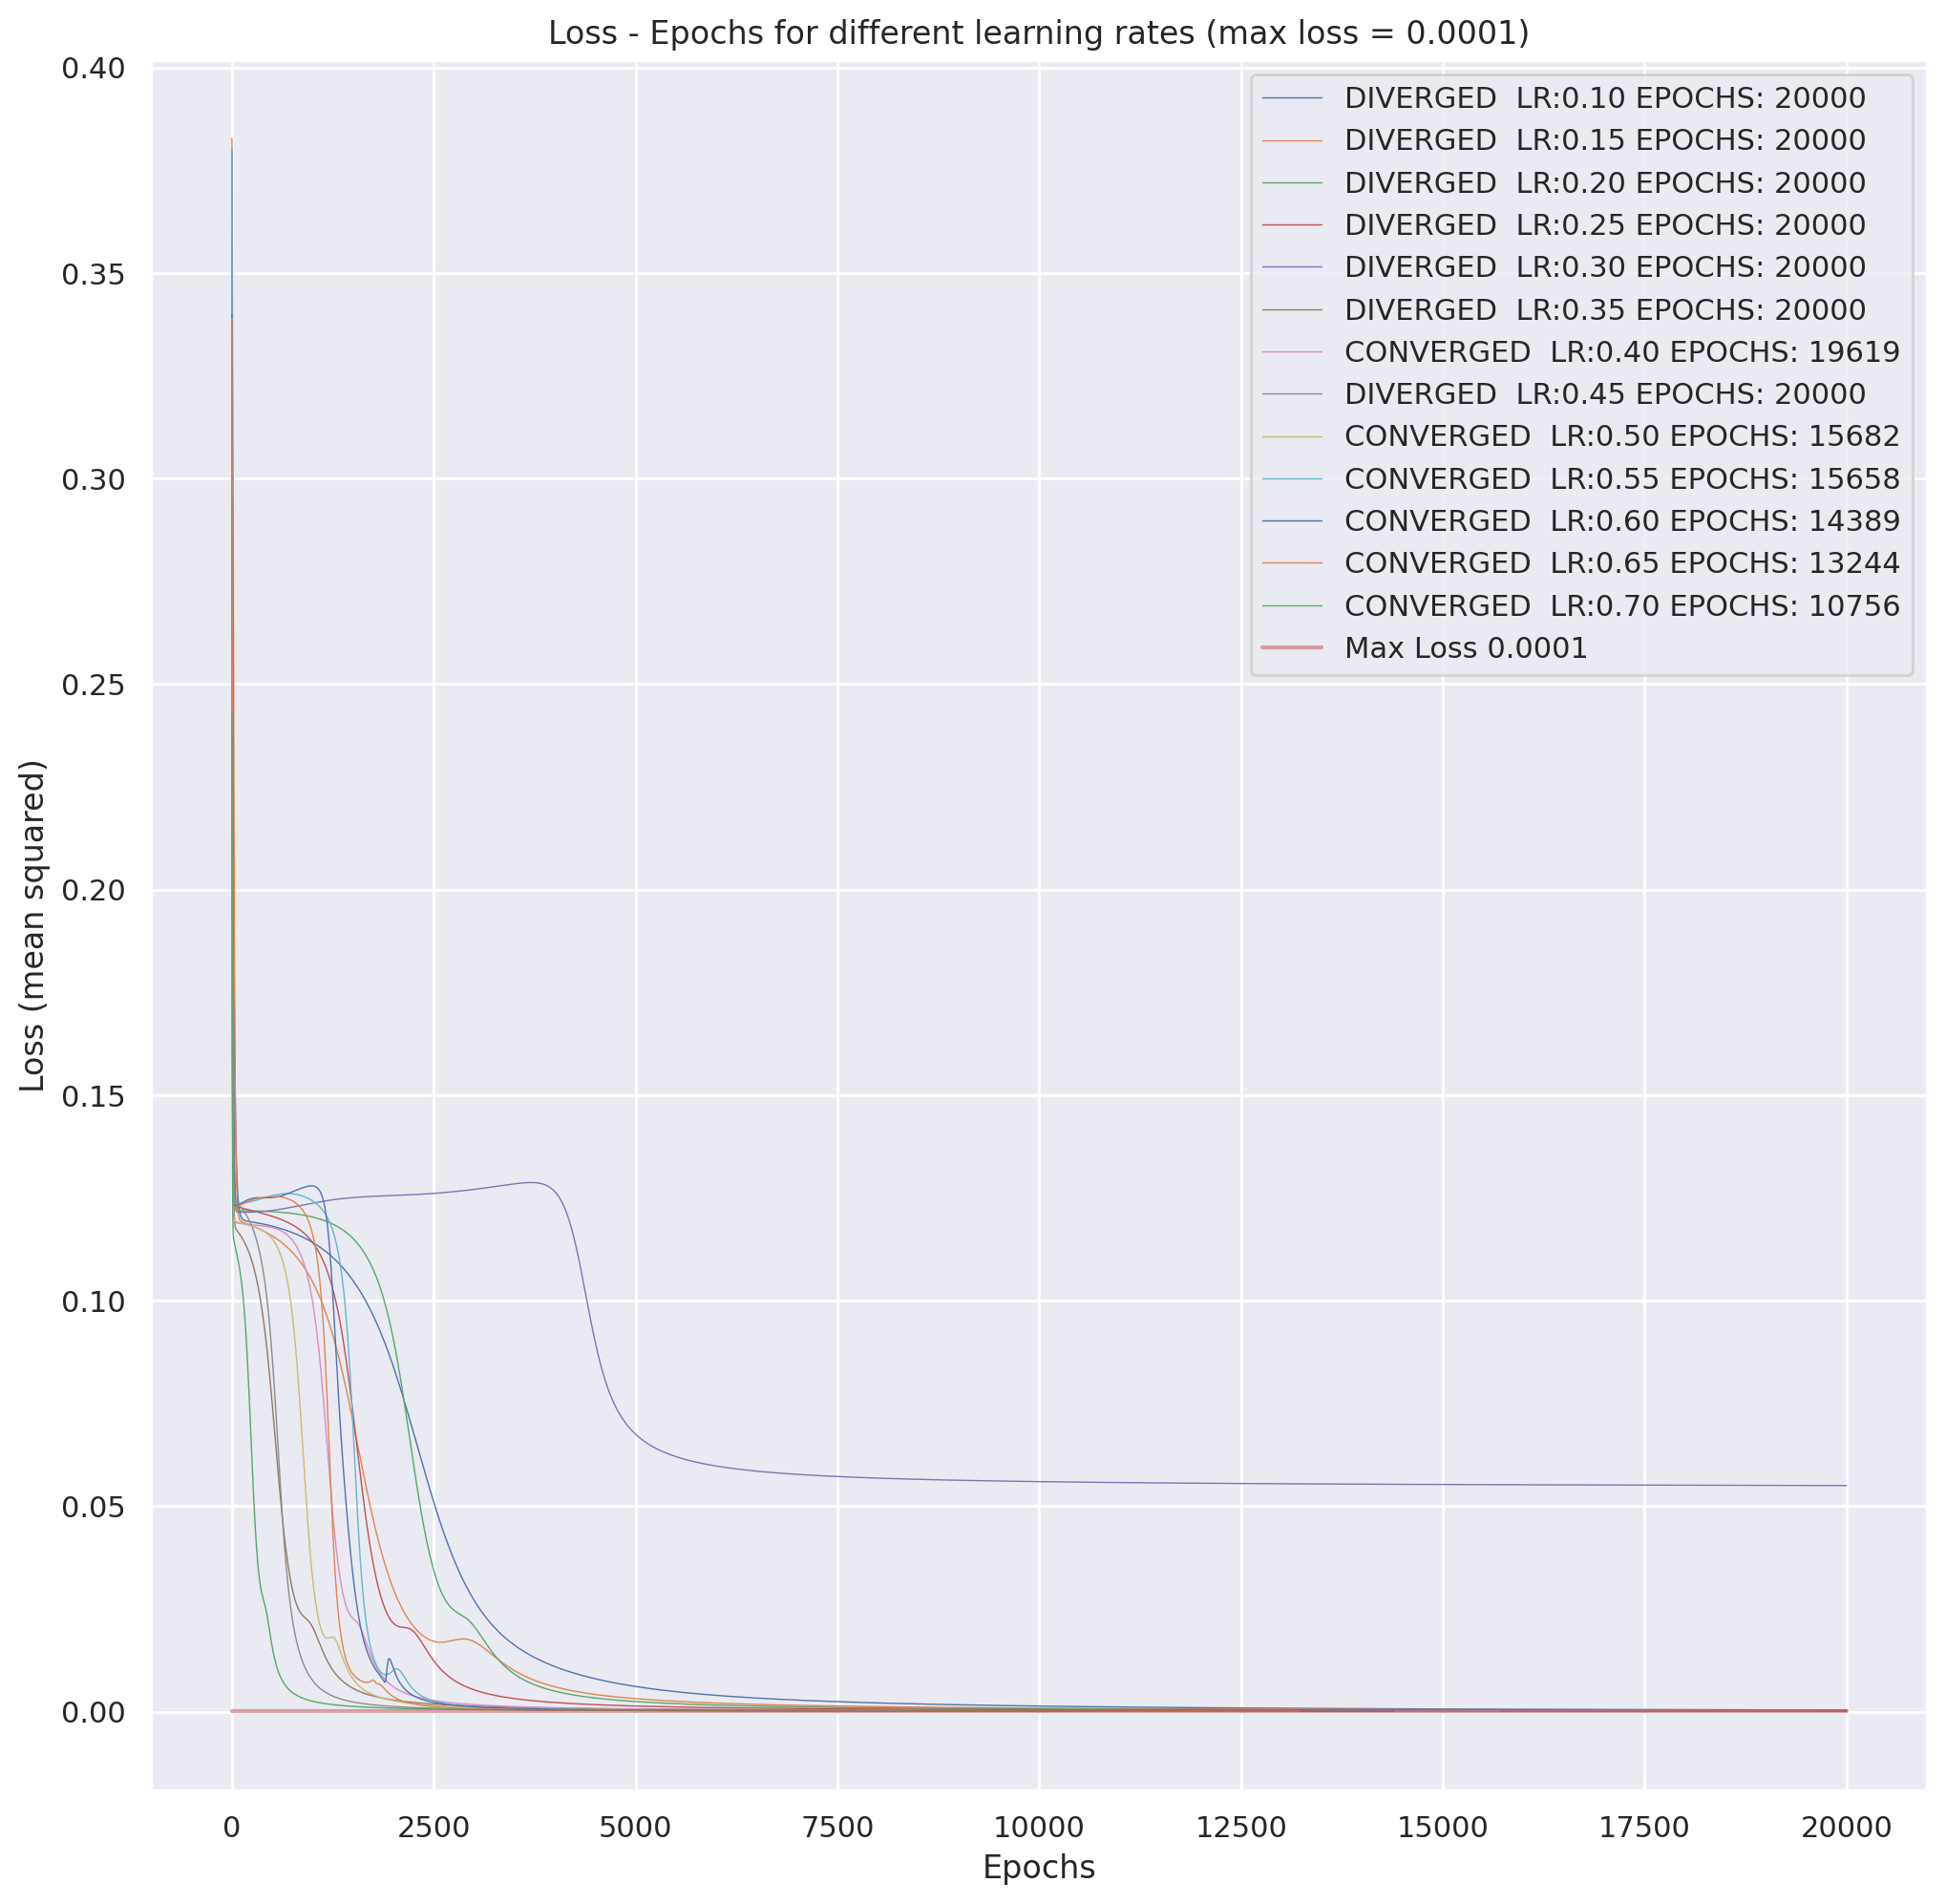

In [4]:
from matplotlib.pyplot import cm

fig, ax = plt.subplots(figsize=(12, 12), dpi=200)

for idx, lr in enumerate(LRs):
    data = losses[idx]
    if len(data) == MAX_EPOCH:
        txt = "DIVERGED "
    else:
        txt = "CONVERGED "
            
        
    ax.plot(data, label=f"{txt} LR:{lr:.2f} EPOCHS: {len(data)}", linewidth=.5)

ax.plot([0, 20000], [MAX_ERROR, MAX_ERROR], label=f"Max Loss {MAX_ERROR}", alpha=0.5)
ax.legend()
ax.set_title(f"Loss - Epochs for different learning rates (max loss = {MAX_ERROR})")
ax.set_ylabel("Loss (mean squared)")
ax.set_xlabel("Epochs")
plt.show()

#### Discussion of graphs

For a much tigher loss threshold of `0.0001` a higher learning rate appears to be more efficient as it converges (faster) to a trained network. Learning rates must be carefully selected, as a big learning rate might converge faster but at the risk of chaotic behaviour which might end up diverging. Small learning rates usually converge but a slower pace than a big one.

## Appendix

The python script that implements the ANN:
`neural_n.py`
```python
import numpy as np

from dataclasses import dataclass, field
from typing import List

rng = np.random.default_rng(4385)


class Neural:
    def __init__(self, max_error=0.01, lr=0.2, epochs=10000):
        self.max_error = max_error
        self.error = None
        self.target = None
        self.lr = lr  # Learning rate
        self.trained = True
        self.track_error = []
        self.epochs = epochs

        self.hid_w = rng.uniform(size=(2, 2))
        self.out_w = rng.uniform(size=(1, 2))

        self.hid_bias = rng.uniform(size=(1, 2))
        self.out_bias = rng.uniform()

    def init_layers(self, in1, in2):
        self.inp = Layer([Node(), Node()])
        self.inp.set("y", in1, in2)
        self.target = np.logical_xor(in1, in2)
        self.hid = Layer([Node(), Node()])
        self.out = Layer([Node()])

    def forward_pass(self):
        # Calculate hidden layer activation
        hid_u = (self.inp.get("y") @ self.hid_w + self.hid_bias).flatten()
        self.hid.set("u", *hid_u)
        # Calculate out layer activation
        out_u = (self.hid.get("y") @ self.out_w.T + self.out_bias).flatten()
        self.out.set("u", *out_u)

        self.error = 0.5 * np.power(self.out.get("y") - self.target, 2)

    def backpropagate(self):
        # Calculate deltas
        out_d = (self.out.get("delta") * (self.target - self.out.get("y"))).flatten()
        self.out.set("delta", out_d)
        hid_d = (self.hid.get("delta") * (out_d @ self.out_w)).flatten()
        self.hid.set("delta", *hid_d)

        # Update hidden weights and bias
        self.inp.set("delta", [0, 0])
        hid_w_upd = self.inp.get("y").T @ self.hid.get("delta") * self.lr
        self.hid_w += hid_w_upd
        hid_b_upd = self.hid.get("delta") * self.lr
        self.hid_bias += hid_b_upd

        # Update output weights and bias
        out_w_upd = self.hid.get("y") * self.out.get("delta") * self.lr
        self.out_w += out_w_upd
        out_b_upd = self.lr * self.out.get("delta")
        self.out_bias += out_b_upd

    def write_to_file(self):
        with open(f"trained_weights{self.lr}-{self.max_error}.txt", "w+") as f:
            np.savetxt(f, self.hid_w)
            np.savetxt(f, self.hid_bias)
            np.savetxt(f, self.out_w)
            np.savetxt(f, self.out_bias)

    def run(self):
        inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        self.trained = True
        for inpt in inputs:
            self.init_layers(*inpt)
            self.forward_pass()
            # Track [0, 0] input error
            if (inpt == [0, 0]).all():
                self.track_error.append(self.error[0])
            if self.error < self.max_error:
                continue
            self.trained = False
            self.backpropagate()

    def run_epochs(self):
        for i in range(self.epochs):
            self.run()
            if self.trained == True:
                print(
                    f"Trained after {i} epochs with target mean squared loss {self.max_error:.4f} and LR={self.lr:.2f}"
                )
                self.write_to_file()
                return
        print(f"Neural Network did not converge after {i} epochs with LR={self.lr:.2f} "
              f" and max squared loss {self.max_error}. Current error : {self.error[0][0]:.4f}")

    def run_w_check(self):
        self.run_epochs()
        inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

        for inpt in inputs:
            self.init_layers(*inpt)
            self.forward_pass()
            print(f"Checking for [{(*inpt,)}]")
            print(f"Target: {int(self.target)} Out {self.out.nodes[0].y}")


@dataclass(eq=False)
class Node:
    u: float = 0
    y: float = field(init=False)
    delta: float = field(init=False)

    def __post_init__(self):
        self.y = self.actf()
        self.delta = self.actf2()

    def __setattr__(self, attr, value):
        # When `u` value is changed, update `y` and `delta`
        if attr == "u":
            self.__dict__[attr] = value
            self.__dict__["y"] = self.actf()
            self.__dict__["delta"] = self.actf2()
        elif attr == "y":
            # When `y` is changed, update `delta`
            self.__dict__["delta"] = self.actf2()
        super().__setattr__(attr, value)

    def actf(self):
        # Activation function
        return 1 / (1 + np.exp(-self.u))

    def actf2(self):
        return self.y * (1 - self.y)


@dataclass(eq=False)
class Layer:
    nodes: List[Node]

    def get(self, attr):
        return np.array([getattr(n, str(attr)) for n in self.nodes]).reshape(
            1, len(self.nodes)
        )

    def set(self, attr, *args):
        if type(args[0]) == np.array or type(args[0]) == list:
            # Untuple if np.array or list
            (args,) = args
        for i, arg in enumerate(args):
            setattr(self.nodes[i], str(attr), arg)


if __name__ == "__main__":
    Neural().run_w_check()


```